# Events, Deployments and Campaign demo

`pynsitu.events` implements a range of objects that are useful for the analysis of in situ experiments. From high to low levels:

- `Campaign`: this object holds all platforms,
- `Platform`: 
- `Deployments`: 
- `Deployment`: 
- `Event`: 

...


In [1]:
import pynsitu as pin

/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/pyTMD/tools.py:55: UserWarning: ipyleaflet not available
  warnings.warn("ipyleaflet not available")
/Users/aponte/.miniconda3/envs/pynsitu/lib/python3.10/site-packages/pyTMD/tools.py:56: UserWarning: Some functions will throw an exception if called
  warnings.warn("Some functions will throw an exception if called")


---

## Campaign


Start from high level and go down


In [2]:
cp = pin.Campaign("../pynsitu/tests/campaign.yaml")
cp

cognac.insitu.events.campaign(drixmed22 2022/09/21 to 2022/09/25)

### Iterate over common deployments

In [3]:
for i in cp:
    print(i, type(cp[i]))

underway <class 'pynsitu.events.Deployment'>
tide_gauge <class 'pynsitu.events.Platform'>
europe <class 'pynsitu.events.Platform'>
drix <class 'pynsitu.events.Platform'>
drifter0 <class 'pynsitu.events.Platform'>
drifter1 <class 'pynsitu.events.Platform'>
drifter2 <class 'pynsitu.events.Platform'>
drifter3 <class 'pynsitu.events.Platform'>
drifter4 <class 'pynsitu.events.Platform'>
drifter5 <class 'pynsitu.events.Platform'>


### show campaign timeline

w
-12 -11.6


<AxesSubplot: title={'center': 'drixmed22'}>

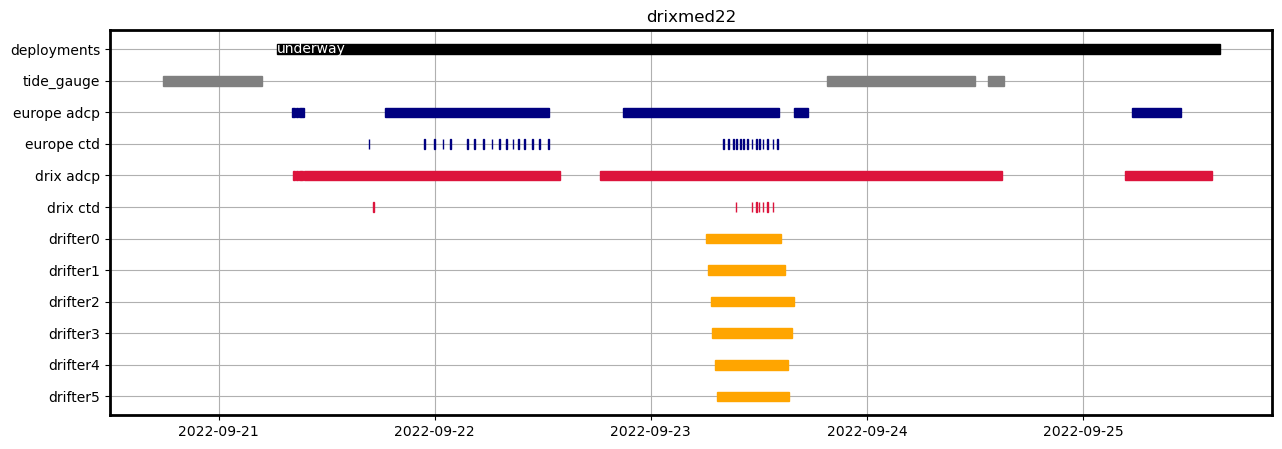

In [4]:
cp.timeline()

---
## other tools: maps (cartopy, folium), ...
